# DATA 531 - Lab 2: Python Functions, docstrings, exception handling, conditions and loops

****
**Name**: FirstName LastName

**Date**: 

**LLM**: None/Copilot/ChatGPT/Other
****

## Objectives

1. Practice solving problems with programs that use variables, expressions, decisions, and looping/iteration.
2. Perform input and output using Python.
3. Experience with string manipulation including data splitting, cleaning, and analysis.
4. Practice writing docstrings for your functions 
5. Practice writing assert statements for your functions
6. Fluency in reading and writing text (CSV) files including using try-except to handle exceptions.

## Question #1 - Letter Frequency Analysis using Dictionaries (2 marks)

Create a Python program that takes a string text and calculates the frequency of each letter and punctuation. Data set (copy as string into Python code):

    text = """She should have died hereafter.
    There would have been a time for such a word.
    Tomorrow, and tomorrow, and tomorrow,
    Creeps in this petty pace from day to day
    To the last syllable of recorded time,
    And all our yesterdays have lighted fools
    The way to dusty death. Out, out, brief candle!
    Life's but a walking shadow, a poor player
    That struts and frets his hour upon the stage
    And then is heard no more. It is a tale
    Told by an idiot, full of sound and fury,
    Signifying nothing.""" # Macbeth: Act 5, Scene 5, Page 2

Details:
- Copy data set above into Python code. 
- Create an empty dictionary to store letter counts.  Upper and lower case letters should be counted together as upper case (e.g. 'A' and 'a'). Punction '.' and '!' and spaces (' ')  have their own entries. All other characters counted as '#' (for other). (0.5 mark)
    - Note that upper case letters are in ASCII table from 65 to 91 and lower case from 97 to 123. [ASCII Table](https://ascii.cl/) [Helpful info](https://terrameijar.wordpress.com/2017/02/03/python-how-to-generate-a-list-of-letters-in-the-alphabet/)
    - Note: the [ord() function](https://docs.python.org/3.4/library/functions.html?highlight=ord#ord) may be useful.
- Use a for loop to process each letter in the text: 
    - Use dictionary to update letter counts. Note: Will need to search dictionary to see if letter exists. If not, then add it otherwise add one to count. (0.5 marks)
- Output the total number of characters and for each character its count and frequency. (0.5 mark)   
- Sort output alphabetically  (0.5 mark)

In [3]:
### Your solution here

text = """She should have died hereafter.
There would have been a time for such a word.
Tomorrow, and tomorrow, and tomorrow,
Creeps in this petty pace from day to day
To the last syllable of recorded time,
And all our yesterdays have lighted fools
The way to dusty death. Out, out, brief candle!
Life's but a walking shadow, a poor player
That struts and frets his hour upon the stage
And then is heard no more. It is a tale
Told by an idiot, full of sound and fury,
Signifying nothing.""" # Macbeth: Act 5, Scene 5, Page 2

text = text.upper()
set_of_characters = {chr for chr in text}
dict_of_char = {chr: text.count(chr) for chr in set_of_characters}
dict_of_char["#"] = 0
dict_keys = list(dict_of_char.keys())
dict_keys.sort()
sorted_dict_of_char = {i: dict_of_char[i] for i in dict_keys}
total_count = 0
for key, val in dict_of_char.items():
    total_count += int(val)
    if (key.isalnum() == False) and (key not in ['.', '!', ' ']) and (key != "#"):
        sorted_dict_of_char["#"] = int(sorted_dict_of_char["#"]) + int(val)
        del sorted_dict_of_char[key]

sorted_dict_of_char = {x: (sorted_dict_of_char[x], "{:.0%}".format((int(sorted_dict_of_char[x])/total_count))) for x in sorted_dict_of_char}

print("{:<8} {:<15} {:<10}".format('Key','Count','Frequency'))
for k, c in sorted_dict_of_char.items():
    count, freq = c
    print("{:<8} {:<15} {:<10}".format(k, count, freq))

 


Key      Count           Frequency 
         78              16%       
!        1               0%        
#        21              4%        
.        5               1%        
A        33              7%        
B        5               1%        
C        5               1%        
D        25              5%        
E        38              8%        
F        12              3%        
G        6               1%        
H        21              4%        
I        19              4%        
K        1               0%        
L        18              4%        
M        7               1%        
N        19              4%        
O        36              8%        
P        6               1%        
R        26              5%        
S        22              5%        
T        36              8%        
U        14              3%        
V        3               1%        
W        8               2%        
Y        12              3%        


## Question #2 - Calculating Taxes (1 mark)

Write a Python function that calculates and prints the tax on a purchased item. The input of this function should be a string, and the pre-tax price of the item.

Details:

- Add a docstring to this function so users know how to use it. 
- Calculate the provincial tax (5%) federal tax (7%), and store them as separate variables. (0.25 mark)
- Use try/except statements to test for inputs to the function (0.25 mark)
- Print the item amount, the provincial tax, the federal tax, and the total with all taxes included. (0.25 mark)
- Round tax amounts to the nearest cent and display with exactly two decimal points. (0.25 mark)


In [7]:
### Your answer here
def cal_tax(price, provincial_tax=0.05, federal_tax=0.07):
    """
    Calculates the provincial and federal tax amounts, in addition to the total.

    Returns the provincial tax amount, federal tax amount, and total amount
    based on the price of the item passed to the function.

    
    Parameters
    ----------
    price: string
        The price of the items.
    provincial_tax: string, optional (default = 0.05)
        The provincial tax rate
    federal_tax: string, optional (default = 0.07)
        The federal tax rate
        
    Returns
    -------
    provincial_tax_amount
        provincial tax amount rounded to 2 decimal places
    
    federal_tax_amount
        federal tax amount rounded to 2 decimal places
    
    total
        total amount rounded to 2 decimal places 
        
    Examples
    --------
    >>> cal_tax(2.22)
    (0.11, 0.16, 2.49)
    """
    provincial_tax_amount = round(float(price) * float(provincial_tax),2)
    federal_tax_amount = round(float(price) * float(federal_tax),2)
    total = float(price) + provincial_tax_amount + federal_tax_amount
    return round(provincial_tax_amount,2), round(federal_tax_amount,2), round(total,2)


try:
    price = input("Enter the price of your item: ")
    price = price.strip()
    while (price.isnumeric() == False) or (price.replace(".", "").isnumeric() == False):
        if (price.replace(".", "").isnumeric() == True):
            break
        else:
            price = input("Enter the price of your item: ")
            price = price.strip()
except:
    print('Something went wrong with the input')

try:
    provincial, federal, total = cal_tax(price)
    print("Item amount is: $", + round(float(price),2))
    print("Provincial amount is: $", + round(float(provincial),2))
    print("Federal amount is: $", + round(federal,2))
    print("Total amount is: $", + total)
except:
    print('Something went wrong calling the cal_tax function.')
    raise

Enter the price of your item:  45.99


Item amount is: $ 45.99
Provincial amount is: $ 2.3
Federal amount is: $ 3.22
Total amount is: $ 51.51


## Question #3 - Data Cleaning (4 marks)

Create a Python program that cleans data in string format. Data set (copy as string into Python code):

    data = """5:Joe:35000:1970-08-09
    4:Steve:49999:1955-01-02
    1:Leah:154000:1999-06-12
    3:Sheyanne:255555:1987-05-14
    2:Matt:24000:1972-11-03
    7:Kyla:1000000:1950-02-01
    8:Dave:15000:2000-09-05
    """
    
Details:

- Use `split()` to separate data into rows (one per line).
- Use a for loop to process each line:
    - Use split() to divide data into four fields (id, name, salary, birthdate). Output the fields. Hint: Use "\t" to add tab in output. (1 marks)
    - Calculate the age using the birthdate and the current date. Print the age. [Reference to convert string to date using strptime](https://docs.python.org/3/library/datetime.html#datetime.datetime.strptime) Note: May also use date.fromisoformat(). (1 marks)
- Calculate and print the total number of people, average salary, highest salary, and youngest employee. (1 marks)
- Use a for loop to process the data set again: 
    - Increase the salary by 20% for any employee whose salary < 40000 or has a name that is less than 5 characters long. Print out new and previous salary. (1 marks)    

### Sample Output

    Id: 5 	Name: Joe 	Salary: 35000 	Birthdate: 1970-08-09
    Age: 49
    Id: 4 	Name: Steve 	Salary: 49999 	Birthdate: 1955-01-02
    Age: 64
    Id: 1 	Name: Leah 	Salary: 154000 	Birthdate: 1999-06-12
    Age: 20
    Id: 3 	Name: Sheyanne 	Salary: 255555 	Birthdate: 1987-05-14
    Age: 32
    Id: 2 	Name: Matt 	Salary: 24000 	Birthdate: 1972-11-03
    Age: 46
    Id: 7 	Name: Kyla 	Salary: 1000000 	Birthdate: 1950-02-01
    Age: 69
    Id: 8 	Name: Dave 	Salary: 15000 	Birthdate: 2000-09-05
    Age: 19

    Number of people: 7
    Total salary: 1533554 Average salary: 219079.14285714287 Max salary: 1000000
    Youngest employee: Dave

    Joe Old salary: 35000 New salary: 42000.0
    Leah Old salary: 154000 New salary: 184800.0
    Matt Old salary: 24000 New salary: 28800.0
    Kyla Old salary: 1000000 New salary: 1200000.0
    Dave Old salary: 15000 New salary: 18000.0

In [5]:
### Your answer here
import datetime

data = """5:Joe:35000:1970-08-09
4:Steve:49999:1955-01-02
1:Leah:154000:1999-06-12
3:Sheyanne:255555:1987-05-14
2:Matt:24000:1972-11-03
7:Kyla:1000000:1950-02-01
8:Dave:15000:2000-09-05
"""


a = []
each_line = [x for x in data.split()]
for x in each_line:
    a.append(x.split(":"))
# sorted_list_of_people = sorted(a, key=lambda x: x[0])
sorted_list_of_people = a
today = datetime.date.today()
age_people = []
temp = sorted_list_of_people
for id, name, salary, birthday in sorted_list_of_people:
    print("Id: " + id + "\t" + "Name: " + name + "\t" + "Salary: " + salary + "\t" + "Birthday: " + birthday)
    birth = datetime.datetime.strptime(birthday, "%Y-%m-%d").date()
    age = today.year - birth.year
    age_people.append(int(age))
    print("Age: " + str(age))

print("\n")
num_people = len(sorted_list_of_people)
print("Total number of people: " + str(num_people))

salary = [int(i[2]) for i in sorted_list_of_people]
total_salary = round(sum(salary),2)
average_salary = round((total_salary/num_people),2)
print("Total salary is: $" + str(total_salary))
print("Average salary is: $" + str(average_salary))

max_salary = max(salary)
print("Highest salary is: $" + str(max_salary))

index_of_youngest = age_people.index(min(age_people))
youngest_person = sorted_list_of_people[index_of_youngest][1]
print("Youngest employee is: " + youngest_person)

print("\n")

for i in sorted_list_of_people:
    salary = round(float(i[2]),2)
    name = i[1]
    if len(name) < 5 or salary < 40000:
        print(name + " old salary: $" + str(salary) + "\t" + "new salary: $" + str(salary*1.2))


Id: 5	Name: Joe	Salary: 35000	Birthday: 1970-08-09
Age: 53
Id: 4	Name: Steve	Salary: 49999	Birthday: 1955-01-02
Age: 68
Id: 1	Name: Leah	Salary: 154000	Birthday: 1999-06-12
Age: 24
Id: 3	Name: Sheyanne	Salary: 255555	Birthday: 1987-05-14
Age: 36
Id: 2	Name: Matt	Salary: 24000	Birthday: 1972-11-03
Age: 51
Id: 7	Name: Kyla	Salary: 1000000	Birthday: 1950-02-01
Age: 73
Id: 8	Name: Dave	Salary: 15000	Birthday: 2000-09-05
Age: 23


Total number of people: 7
Total salary is: $1533554
Average salary is: $219079.14
Highest salary is: $1000000
Youngest employee is: Dave


Joe old salary: $35000.0	new salary: $42000.0
Leah old salary: $154000.0	new salary: $184800.0
Matt old salary: $24000.0	new salary: $28800.0
Kyla old salary: $1000000.0	new salary: $1200000.0
Dave old salary: $15000.0	new salary: $18000.0


## Question #4 - Data Analysis of GDP Data Stored as a CSV File (3 marks)

Create a Python program that uses the open data set on GDP from the Canadian government [36100293.csv](Data/36100293.csv) ([Original data source](https://open.canada.ca/data/en/dataset/b0c4a8e1-bb44-4ea8-a389-a3a6b87573aa)) to answer some GDP questions and produce a graph. Details: 

- Ensure the data file [36100293.csv](Data/36100293.csv) is in your code directory for input. There is also a metadata file [36100293_MetaData.csv](Data/36100293_MetaData.csv) providing info on the data file (not required to use).
- Create an empty dictionary that will eventually have the year as a key and the GDP for that year as a value. Create two empty lists to store year and GDP data.
- Read the data file using the ``csv`` module and store the GDP for each year in the dictionary and the year and GDP in each list. Code must use try-except to handle any errors. Note that this data set has lots of data besides GDP so you will need to determine which rows store GDP values.
- Prompt the user for a year and output the GDP for that year from the dictonary. (0.5 mark)
- Calculate and print the GDP change from the user year and the GDP in the 1970. (0.5 mark)
- Create a line chart using matplotlib showing the GDP from 1961 to 2011. Here is [matplotlib line chart example code](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/simple_plot.html) Use the GDP and year lists created previously for the chart data. (2 mark)


Enter the year for which you want to see the GDP:  1965


GDP in 1965: 20.6 billion dollars.
GDP in 1970: 25.7 billion dollars.
The difference in GDP from your chosen year and 1970 is -19.84%




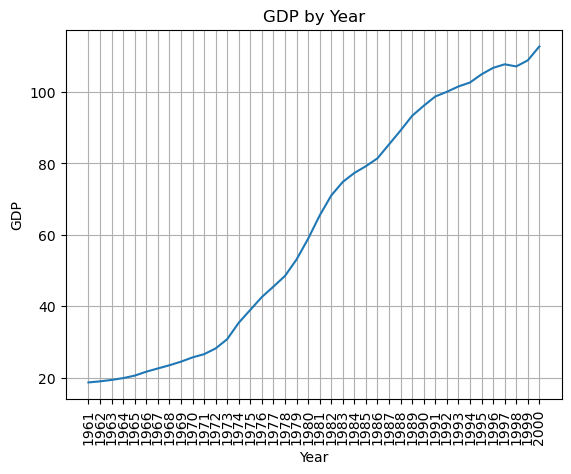

In [2]:
### Your answer here

import csv
import matplotlib
import matplotlib.pyplot as plt

lines = []
gdp_year = {}
year = []
gdp = []

try:
    with open("./36100256.csv", 'r') as file:
        read_csv = csv.reader(file, skipinitialspace=True)
        for row in read_csv:
            lines.append(row)
except:
    print('Something went wrong while reading the csv')
    raise





try:
    value_index = lines[0].index('VALUE')
    indexes_index = lines[0].index('Indexes')
    estimates_index = lines[0].index('Estimates')
    for i in lines:
        if ('Gross domestic' in i[estimates_index]) and ('Implicit price index' in i[indexes_index]):
            year.append(i[0])
            gdp.append(float(i[value_index]))
    # for i in lines:
    #     for y in i:
    #         if ('Gross domestic' in y) and ('Implicit price index' in y):
    #             year.append(i[0])
    #             gdp.append(float(i[value_index]))
    
    gdp_year = {year[x]: gdp[x] for x in range(len(year)-1)}
except:
    print("Something went wrong with extracting GDP and Year from the CSV")

try:
    input_year = input('Enter the year for which you want to see the GDP: ')
    input_year = input_year.strip()
    print("GDP in " + input_year + ": " + str(gdp_year[input_year]) + " billion dollars.")
    gdp_difference = "{:.2%}".format((gdp_year[input_year]-gdp_year['1970'])/gdp_year['1970'])
    print("GDP in 1970: " + str(gdp_year['1970']) + " billion dollars.")
    print("The difference in GDP from your chosen year and 1970 is " + str(gdp_difference))
except KeyError:
    print("The year you selected in not in the list, please try again.")
except:
    print("There was an issue with your input year, please try again.")
    raise
    
print("\n")

try:
    fig, ax = plt.subplots()
    ax.plot(year, gdp)
    ax.set(xlabel='Year', ylabel='GDP',
           title='GDP by Year')
    ax.grid()
    plt.xticks(year, rotation=90)
    plt.show()
except:
    print('Something went wrong with the graph of GDP by Year.')
